In [1905]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [1906]:
df1 = pd.read_csv("PricePredModel.csv")
df1.head()

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1
0,あきる野,109,91124000,1.2,1.0,住宅,W
1,あきる野,325,193700000,1.5,1.0,住宅,W
2,あきる野,196,136416000,1.0,1.0,住宅,W
3,あきる野,121,79981000,1.0,1.2,住宅,W
4,あきる野,119,82705000,1.0,1.2,住宅,W


In [1907]:
df1.shape

(2663, 7)

In [1908]:
df1.isnull().sum()

標準地番号     0
標準地の地積    0
合計価格      0
間口        0
奥行        0
標準地の利用    0
構造_1      0
dtype: int64

In [1909]:
len(df1['標準地番号'].unique())

100

In [1910]:
df1['標準地番号'] = df1['標準地番号'].apply(lambda x: x.strip())

location_stats = df1.groupby('標準地番号')['標準地番号'].agg('count').sort_values(ascending=False)
location_stats 

標準地番号
八王子    108
世田谷    104
練馬      81
船橋      76
足立      72
      ... 
茂原       2
日の出      2
新島       1
八丈       1
東金       1
Name: 標準地番号, Length: 100, dtype: int64

In [1911]:
len(location_stats[location_stats <=30])

70

In [1912]:
location_stats_less_than_30 = location_stats[location_stats <=30]
location_stats_less_than_30

標準地番号
豊島      30
三鷹      28
立川      28
多摩      27
横浜青葉    27
        ..
茂原       2
日の出      2
新島       1
八丈       1
東金       1
Name: 標準地番号, Length: 70, dtype: int64

In [1913]:
df1['標準地番号'] = df1['標準地番号'].apply(lambda x: "その他" if x in location_stats_less_than_30 else x)
len(df1['標準地番号'].unique())

31

In [1914]:
df2 = df1.copy()
df2['１平方メートル当たりの価格'] = df1['合計価格']/df1['標準地の地積']
df2.head(5)

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1,１平方メートル当たりの価格
0,その他,109,91124000,1.2,1.0,住宅,W,836000.0
1,その他,325,193700000,1.5,1.0,住宅,W,596000.0
2,その他,196,136416000,1.0,1.0,住宅,W,696000.0
3,その他,121,79981000,1.0,1.2,住宅,W,661000.0
4,その他,119,82705000,1.0,1.2,住宅,W,695000.0


In [1915]:
str_stats = df2.groupby('構造_1')['構造_1'].agg('count').sort_values(ascending=False)
str_stats 

構造_1
W      1602
RC      385
LS      307
S       280
SRC      88
B         1
Name: 構造_1, dtype: int64

In [1916]:
keep_strings = ['W', 'RC', 'LC', 'S']
#keep_strings = ['住宅']
# filter dataframe to only include rows with keep_strings in the 'text' column
df2 = df2.loc[df2['構造_1'].isin(keep_strings)]
df2.head()

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1,１平方メートル当たりの価格
0,その他,109,91124000,1.2,1.0,住宅,W,836000.0
1,その他,325,193700000,1.5,1.0,住宅,W,596000.0
2,その他,196,136416000,1.0,1.0,住宅,W,696000.0
3,その他,121,79981000,1.0,1.2,住宅,W,661000.0
4,その他,119,82705000,1.0,1.2,住宅,W,695000.0


In [1917]:
df2["標準地番号"].unique()

array(['その他', '世田谷', '中野', '八王子', '北', '千葉中央', '品川', '大田', '市原', '市川',
       '文京', '新宿', '日野', '杉並', '東京府中', '松戸', '板橋', '柏', '横浜戸塚', '横浜港北',
       '横浜港南', '江戸川', '渋谷', '港', '町田', '目黒', '練馬', '船橋', '葛飾', '調布', '足立'],
      dtype=object)

In [1918]:
df2['構造_1'].unique()

array(['W', 'S', 'RC'], dtype=object)

In [1919]:
df2['１平方メートル当たりの価格'].describe()

count    2.267000e+03
mean     4.454601e+05
std      4.614626e+05
min      1.200000e+04
25%      1.880000e+05
50%      3.260000e+05
75%      5.695000e+05
max      9.400000e+06
Name: １平方メートル当たりの価格, dtype: float64

In [1920]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('標準地番号'):
        m = np.mean(subdf['１平方メートル当たりの価格'])
        st = np.std(subdf['１平方メートル当たりの価格'])
        reduced_df = subdf[(subdf['１平方メートル当たりの価格']>(m-st)) & (subdf['１平方メートル当たりの価格']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df3 = remove_pps_outliers(df2)
df3.shape

(1908, 8)

C:\Users\deymo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19990 (\N{CJK UNIFIED IDEOGRAPH-4E16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\deymo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\deymo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


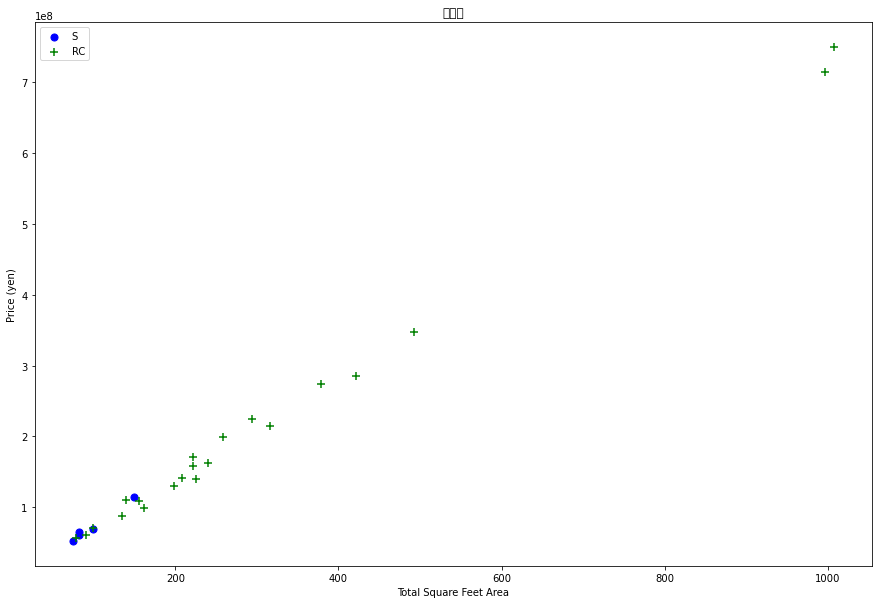

In [1921]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['標準地番号']==location) & (df['構造_1']=='S')]
    bhk3 = df[(df['標準地番号']==location) & (df['構造_1']=='RC')]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['標準地の地積'],bhk2['合計価格'],color='blue',label='S', s=50)
    plt.scatter(bhk3['標準地の地積'],bhk3['合計価格'],marker='+', color='green',label='RC', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (yen)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"世田谷")

Text(0, 0.5, 'Count')

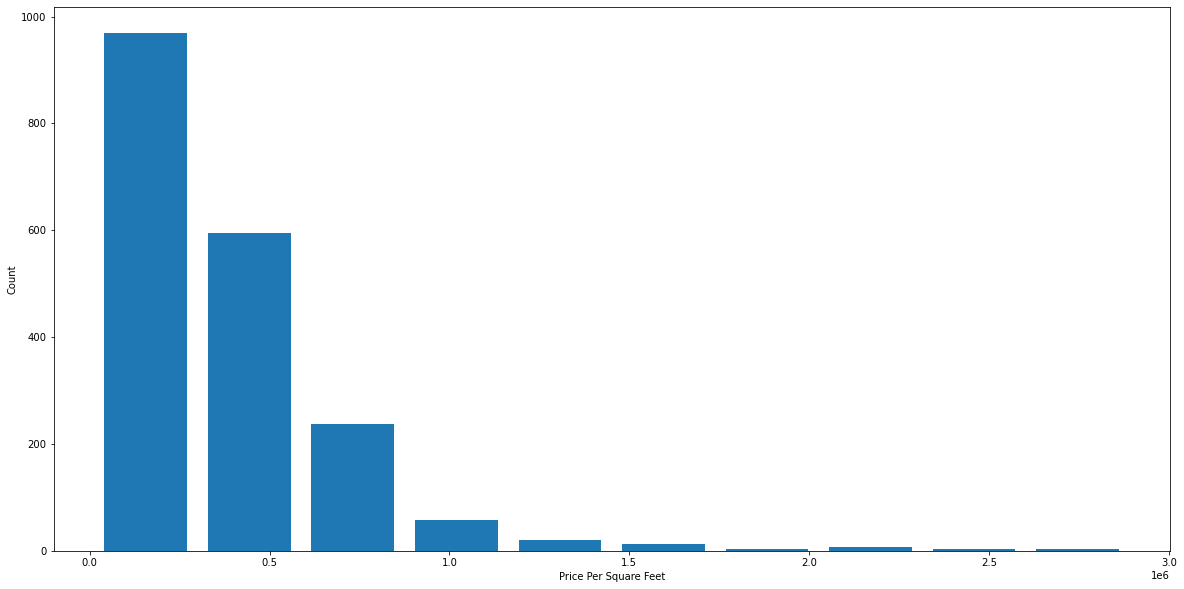

In [1922]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3['１平方メートル当たりの価格'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

C:\Users\deymo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\deymo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


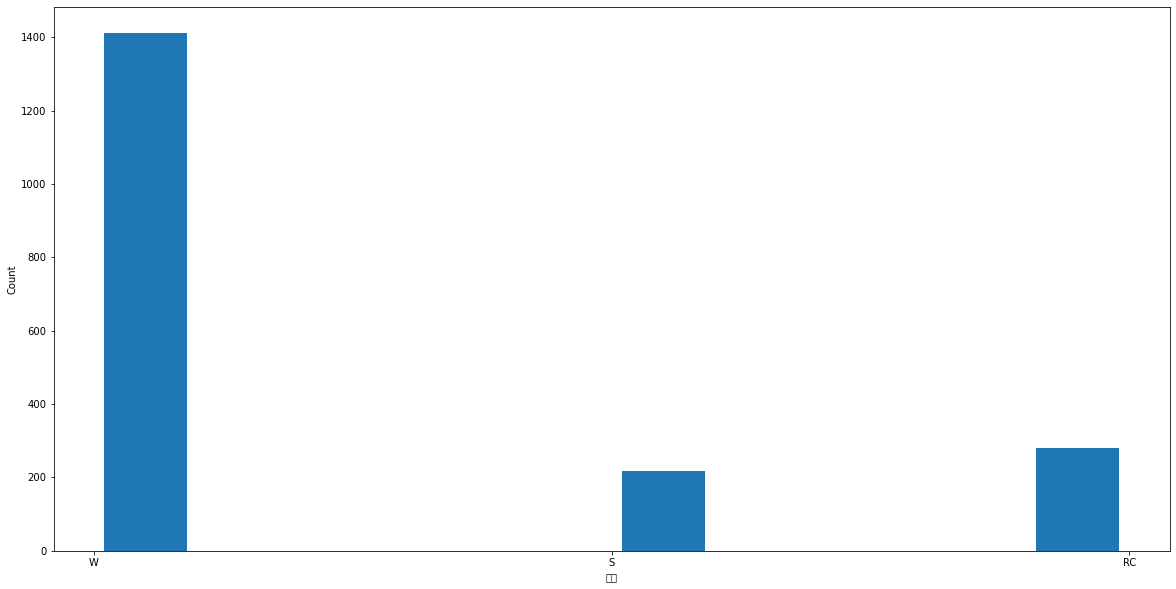

In [1923]:
plt.hist(df3['構造_1'],rwidth=0.8)
plt.xlabel("構造")
plt.ylabel("Count")

## Use One Hot Encoding For Location

In [1924]:
df3.head()

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1,１平方メートル当たりの価格
0,その他,325,193700000,1.5,1.0,住宅,W,596000.0
1,その他,196,136416000,1.0,1.0,住宅,W,696000.0
2,その他,121,79981000,1.0,1.2,住宅,W,661000.0
3,その他,119,82705000,1.0,1.2,住宅,W,695000.0
4,その他,220,47960000,1.0,1.2,店舗、事務所兼住宅,S,218000.0


In [1925]:
df3['標準地の利用'].unique()

array(['住宅', '店舗、事務所兼住宅', '共同住宅', '店舗、住宅兼車庫', '店舗兼住宅', '店舗兼共同住宅',
       '事務所兼共同住宅', '事務所、倉庫兼住宅', '店舗、事務所兼共同住宅', '事務所、作業所兼共同住宅', '住宅兼工場',
       '事務所兼住宅', '作業所、事務所兼住宅', '工場、事務所兼住宅等', '共同住宅兼作業所', '診療所兼住宅',
       '作業所兼住宅', '倉庫、事務所兼住宅', '事務所、作業所兼住宅', '倉庫兼共同住宅', '事業所兼住宅',
       '店舗、工場兼共同住宅等', '事業所、共同住宅兼住宅', '住宅兼共同住宅', '店舗、共同住宅兼事務所',
       '店舗、共同住宅兼倉庫', '住宅兼事務所', '工場兼住宅', '事務所、住宅兼倉庫', '工場、事務所兼住宅',
       '事務所、車庫兼共同住宅', '店舗、車庫兼共同住宅', '住宅、工場兼事務所', '店舗、住宅兼共同住宅',
       '共同住宅、住宅兼事務所', '店舗、事務所兼共同住宅等', '共同住宅兼住宅', '営業所兼住宅', '医院兼共同住宅',
       '住宅兼車庫', '共同住宅兼事務所', '共同住宅兼店舗', '共同住宅兼駐車場', '作業所、住宅兼共同住宅',
       '車庫、事務所兼共同住宅', '作業所兼共同住宅', '住宅兼倉庫', '住宅兼作業所', '倉庫兼住宅'],
      dtype=object)

In [1926]:
keep_strings = ['住宅', '共同住宅']
#keep_strings = ['住宅']
# filter dataframe to only include rows with keep_strings in the 'text' column
df4 = df3.loc[df3['標準地の利用'].isin(keep_strings)]
df4.head()

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1,１平方メートル当たりの価格
0,その他,325,193700000,1.5,1.0,住宅,W,596000.0
1,その他,196,136416000,1.0,1.0,住宅,W,696000.0
2,その他,121,79981000,1.0,1.2,住宅,W,661000.0
3,その他,119,82705000,1.0,1.2,住宅,W,695000.0
5,その他,163,24287000,1.0,1.5,住宅,W,149000.0


In [1927]:
df4['標準地の利用'].unique()

array(['住宅', '共同住宅'], dtype=object)

In [1928]:
df4["構造_1"].unique()

array(['W', 'RC', 'S'], dtype=object)

In [1929]:
dummies_loc = pd.get_dummies(df4["標準地番号"], drop_first=True)
dummies_loc.head()

,世田谷,中野,八王子,北,千葉中央,品川,大田,市原,市川,文京,...,江戸川,渋谷,港,町田,目黒,練馬,船橋,葛飾,調布,足立
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1930]:
dummies_kouzou = pd.get_dummies(df4["構造_1"])
dummies_kouzou.head()

,RC,S,W
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1


In [1931]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1932]:
using = df4.copy()  # make a copy of the original DataFrame
using.loc[:, "標準地の利用"] = le.fit_transform(using["標準地の利用"]) 
using

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1,１平方メートル当たりの価格
0,その他,325,193700000,1.5,1.0,0,W,596000.0
1,その他,196,136416000,1.0,1.0,0,W,696000.0
2,その他,121,79981000,1.0,1.2,0,W,661000.0
3,その他,119,82705000,1.0,1.2,0,W,695000.0
5,その他,163,24287000,1.0,1.5,0,W,149000.0
...,...,...,...,...,...,...,...,...
1901,足立,170,56950000,1.0,2.0,0,RC,335000.0
1902,足立,99,32868000,1.0,2.0,0,S,332000.0
1905,足立,134,31088000,1.0,2.5,0,W,232000.0
1906,足立,94,24440000,1.0,2.5,0,W,260000.0


# Concat columns below

In [1933]:
df5 = pd.concat([using, dummies_loc, dummies_kouzou],axis='columns')
df5

,標準地番号,標準地の地積,合計価格,間口,奥行,標準地の利用,構造_1,１平方メートル当たりの価格,世田谷,中野,...,町田,目黒,練馬,船橋,葛飾,調布,足立,RC,S,W
0,その他,325,193700000,1.5,1.0,0,W,596000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,その他,196,136416000,1.0,1.0,0,W,696000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,その他,121,79981000,1.0,1.2,0,W,661000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,その他,119,82705000,1.0,1.2,0,W,695000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,その他,163,24287000,1.0,1.5,0,W,149000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,足立,170,56950000,1.0,2.0,0,RC,335000.0,0,0,...,0,0,0,0,0,0,1,1,0,0
1902,足立,99,32868000,1.0,2.0,0,S,332000.0,0,0,...,0,0,0,0,0,0,1,0,1,0
1905,足立,134,31088000,1.0,2.5,0,W,232000.0,0,0,...,0,0,0,0,0,0,1,0,0,1
1906,足立,94,24440000,1.0,2.5,0,W,260000.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1934]:
df6 = df5.drop(['標準地番号', '間口', '奥行', '構造_1', '１平方メートル当たりの価格'], axis='columns')
df6.columns

Index(['標準地の地積', '合計価格', '標準地の利用', '世田谷', '中野', '八王子', '北', '千葉中央', '品川', '大田',
       '市原', '市川', '文京', '新宿', '日野', '杉並', '東京府中', '松戸', '板橋', '柏', '横浜戸塚',
       '横浜港北', '横浜港南', '江戸川', '渋谷', '港', '町田', '目黒', '練馬', '船橋', '葛飾', '調布',
       '足立', 'RC', 'S', 'W'],
      dtype='object')

In [1935]:
X = df6.drop('合計価格', axis='columns')
X.head()

,標準地の地積,標準地の利用,世田谷,中野,八王子,北,千葉中央,品川,大田,市原,...,町田,目黒,練馬,船橋,葛飾,調布,足立,RC,S,W
0,325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,196,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,163,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1936]:
kanji_to_romaji = {
    "標準地の地積": "Sqft",
    "標準地の利用": "Structure",
    "世田谷": "Setagaya",
    "中野": "Nakano",
    "八王子": "Hachioji",
    "北": "Kita",
    "千葉中央": "Chiba Chuo",
    "品川": "Shinagawa",
    "大田": "Ota",
    "市原": "Ichihara",
    "市川": "Ichikawa",
    "文京": "Bunkyo",
    "新宿": "Shinjuku",
    "日野": "Hino",
    "杉並": "Suginami",
    "東京府中": "Tokyo Fuchu",
    "松戸": "Matsudo",
    "板橋": "Itabashi",
    "柏": "Kashiwa",
    "横浜戸塚": "Yokohama Totsuka",
    "横浜港北": "Yokohama Kohoku",
    "横浜港南": "Yokohama Konan",
    "江戸川": "Edogawa",
    "渋谷": "Shibuya",
    "港": "Minato",
    "町田": "Machida",
    "目黒": "Meguro",
    "練馬": "Nerima",
    "船橋": "Funabashi",
    "葛飾": "Katsushika",
    "調布": "Chofu",
    "足立": "Adachi"
}

# Rename the columns using the dictionary
X = X.rename(columns=kanji_to_romaji)
X.head()

,Sqft,Structure,Setagaya,Nakano,Hachioji,Kita,Chiba Chuo,Shinagawa,Ota,Ichihara,...,Machida,Meguro,Nerima,Funabashi,Katsushika,Chofu,Adachi,RC,S,W
0,325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,196,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,163,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1937]:
y = df6['合計価格']
y.head()

0    193700000
1    136416000
2     79981000
3     82705000
5     24287000
Name: 合計価格, dtype: int64

## Scaler

In [1938]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled[:3]
# y_scaled = scaler.fit_transform(y)

In [1939]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [1940]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6550963254611664

In [1941]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)
dr.score(X_test,y_test)

0.8487117242137621

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [1942]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.38741443, 0.4053187 , 0.49381833, 0.68714564, 0.74629003])

In [1943]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.34488125, 0.75075769, 0.48143965, 0.62797376, 0.74517418])

In [1944]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

import pandas as pd

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': { }
        },
        'lasso': {
            'model': Lasso(max_iter=10000),
            'params': {
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
             #   'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    #　↑　Cross Validation ShuffleSplit, which just randomly shuffle our sample
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\deymo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.089e+17, tolerance: 4.521e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\deymo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+18, tolerance: 1.206e+16
  model = cd_fast.enet_coordinate_descent(
C:\Users\deymo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+18, toleranc

,model,best_score,best_params
0,linear_regression,0.536714,{}
1,lasso,0.536714,{'selection': 'cyclic'}
2,decision_tree,0.107831,{'splitter': 'random'}


In [1946]:
X.columns

Index(['Sqft', 'Structure', 'Setagaya', 'Nakano', 'Hachioji', 'Kita',
       'Chiba Chuo', 'Shinagawa', 'Ota', 'Ichihara', 'Ichikawa', 'Bunkyo',
       'Shinjuku', 'Hino', 'Suginami', 'Tokyo Fuchu', 'Matsudo', 'Itabashi',
       'Kashiwa', 'Yokohama Totsuka', 'Yokohama Kohoku', 'Yokohama Konan',
       'Edogawa', 'Shibuya', 'Minato', 'Machida', 'Meguro', 'Nerima',
       'Funabashi', 'Katsushika', 'Chofu', 'Adachi', 'RC', 'S', 'W'],
      dtype='object')

## Test the model for few properties

In [1947]:
# def predict_price(location, sqft, using, kouzou):    
#     loc_index = np.where(X.columns==location)[0][0]
#     size_index = np.where(X.columns==kouzou)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = using
#     if loc_index >= 0:
#         x[loc_index] = 1
#     if size_index >= 0:
#         x[size_index] = 1

#     return lr_clf.predict([x])[0]

In [1948]:
def predict_price(location, sqft, using, kouzou):    
    loc_index = np.where(X.columns==location)[0][0]
    size_index = np.where(X.columns==kouzou)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = using
    if loc_index >= 0:
        x[loc_index] = 1
    if size_index >= 0:
        x[size_index] = 1

    return dr.predict([x])[0]

In [1949]:
predict_price('Shinjuku', 130, 0, 'W')

C:\Users\deymo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


89830000.0

In [1950]:
predict_price('Shinagawa', 75, 0, 'W')

C:\Users\deymo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


68432000.0

In [1951]:
predict_price('Adachi', 100, 0, 'W')

C:\Users\deymo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


24400000.0

## Export the tested model to a pickle file

In [1952]:
import pickle
with open('kantou_home_prices_model.pickle','wb') as f:
    pickle.dump(dr,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [1953]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))